In [1]:
import os
import random

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [5, 5]
matplotlib.rcParams['figure.dpi'] = 200

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

from data_helper import CorruptedUnlabeledDataset
from data_helper import AddGaussianNoise

random.seed(0)
np.random.seed(0)
torch.manual_seed(0);

# All the images are saved in image_folder
image_folder = '../data'

# The first 106 scenes are unlabeled
unlabeled_scene_index = np.arange(106)

In [8]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.54, 0.60, 0.63), (0.34, 0.34, 0.34)),
])

noise = AddGaussianNoise(mean=0.0, std=0.1)

unlabeled_trainset = CorruptedUnlabeledDataset(
    image_folder=image_folder,
    scene_index=unlabeled_scene_index,
    transform=transform,
    noise=noise
)
trainloader = torch.utils.data.DataLoader(
    unlabeled_trainset,
    batch_size=256,
    shuffle=True,
    num_workers=2
)

In [9]:
# [batch_size, 3, H, W]
input_, target_ = iter(trainloader).next()
print(input_.shape)
print(target_.shape)

torch.Size([256, 3, 224, 224])
torch.Size([256, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


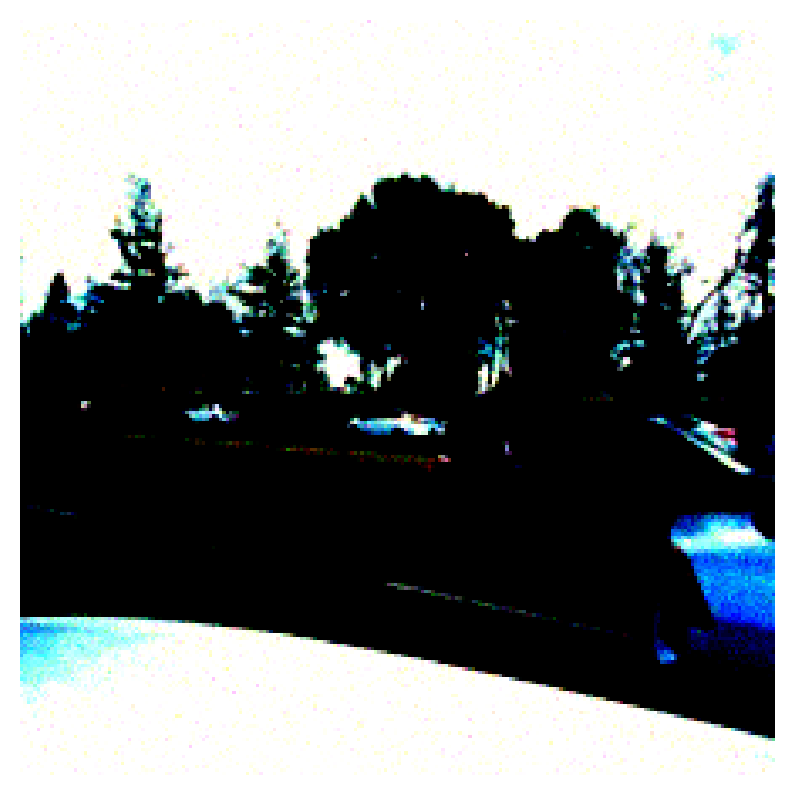

In [17]:
plt.imshow(input_[178].numpy().transpose(1, 2, 0))
plt.axis('off');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


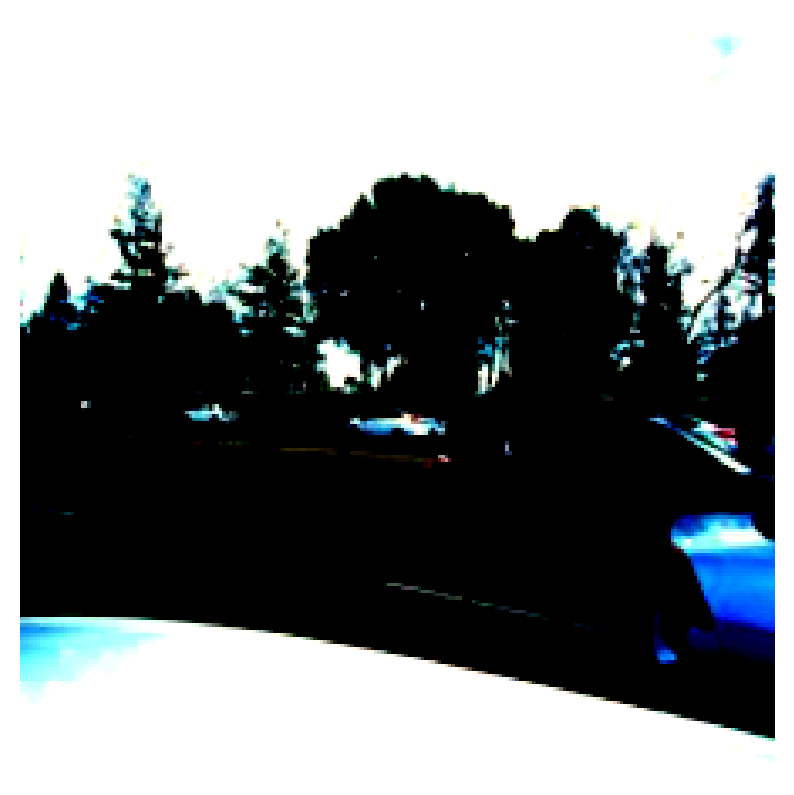

In [16]:
plt.imshow(target_[178].numpy().transpose(1, 2, 0))
plt.axis('off');